# Experimenting with Determined

In [1]:
%load_ext autoreload
%autoreload 2

## Loading from a Delta Table

In [2]:
from data import download_version

version = 0
table_path = download_version('train/', 'david-voc-delta', version=version, save_path=f"train_v{version}/")

In [3]:
from data import VOCDeltaDataset
ds = VOCDeltaDataset(table_path)
ds.get(5)

,key,image,annotations
0,v1/JPEGImages/2008_000008.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,<annotation>\n\t<folder>VOC2011</folder>\n\t<f...
1,v1/JPEGImages/2008_000015.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,<annotation>\n\t<folder>VOC2011</folder>\n\t<f...
2,v1/JPEGImages/2008_000023.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02...,<annotation>\n\t<folder>VOC2011</folder>\n\t<f...
3,v1/JPEGImages/2008_000028.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,<annotation>\n\t<folder>VOC2011</folder>\n\t<f...
4,v1/JPEGImages/2008_000033.jpg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,<annotation>\n\t<folder>VOC2011</folder>\n\t<f...


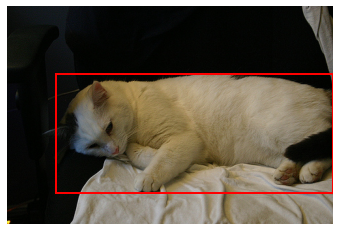

In [4]:
from data import draw_example
image, labels = ds[600]
draw_example(image, labels)

## Hyperparameter Search with Determined

In [ ]:
!det e create search.yaml .

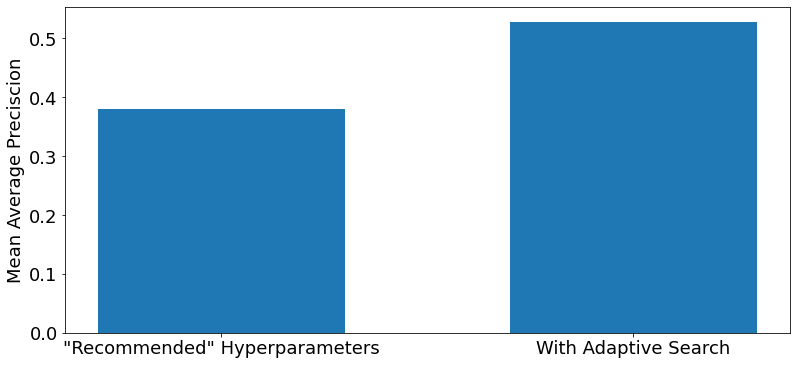

In [19]:
from matplotlib import pyplot as plt
from utils import show_hp_comparison

show_hp_comparison()


# How can we improve?

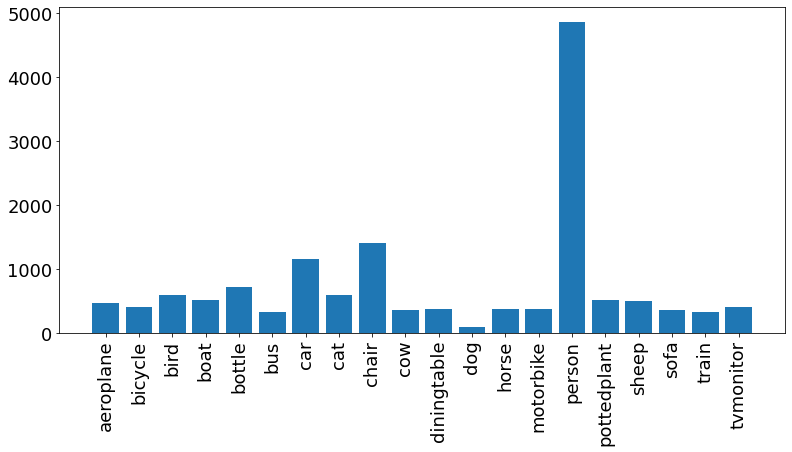

In [6]:
%matplotlib inline
ds.draw_histogram()

In [10]:
from data import download_version

version = 1
table_path = download_version('train/', 'david-voc-delta', version=version, save_path=f"train_v{version}/")
ds_v2 = VOCDeltaDataset(table_path)


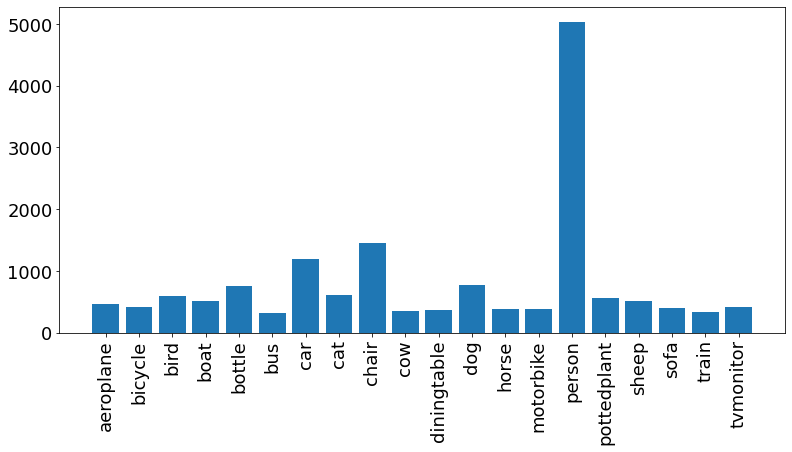

In [11]:
ds_v2.draw_histogram()

In our last experiment, we could see that our performance on the 'Dog' class was lackluster -- how can we do better?  Most often the right answer is to collect more data.

### Quickly Training with New Data
With a new dataset, lets make a new experiment in Determined.  This time we'll fine tune the best model produced by our last experiment, using 16-GPU distributed training to accelerate the process.

In [ ]:
!det e create distributed.yaml

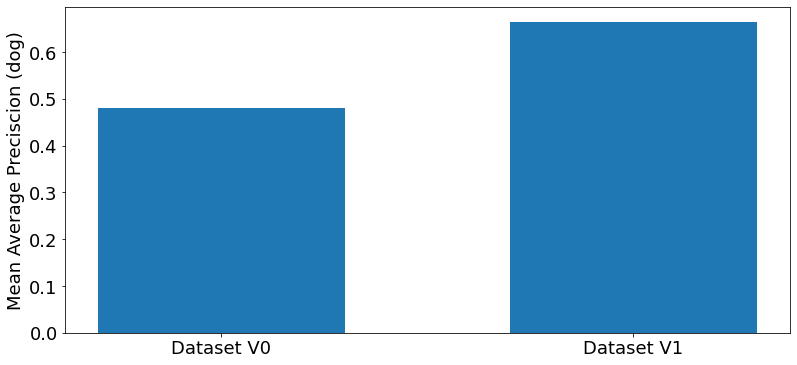

In [21]:
from utils import show_dog_comparison

show_dog_comparison()